Assignment: Exploratory Data Analysis (EDA) on the Titanic Dataset

Task 1: Data Loading and Initial Inspection
 

In [2]:
import pandas as pd

In [ ]:
# 1. Load the Dataset
df = pd.read_csv("titanic.csv")

In [ ]:
# 2. Display First 5 Rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 3. Check Data Types and Structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 4. Descriptive Statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 5. Missing Values Count
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Task 2: Handling Missing Values

In [ ]:
# Cabin Column
cabin_missing_percentage = (df['Cabin'].isnull().sum() / len(df)) * 100
cabin_missing_percentage


np.float64(77.10437710437711)

In [ ]:
# Drop the Cabin column
df.drop(columns='Cabin', inplace=True)


In [ ]:
# Embarked Column
df['Embarked'].mode()


0    S
Name: Embarked, dtype: object

In [ ]:
# Most frequent value: S (Southampton)
df['Embarked'].fillna('S', inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_8164\399897443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [ ]:
# Age Column
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_8164\3098599598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


Task 3: Univariate Analysis


In [ ]:
# Survival Rate
survival_rate = df['Survived'].mean() * 100
survival_rate


np.float64(38.38383838383838)

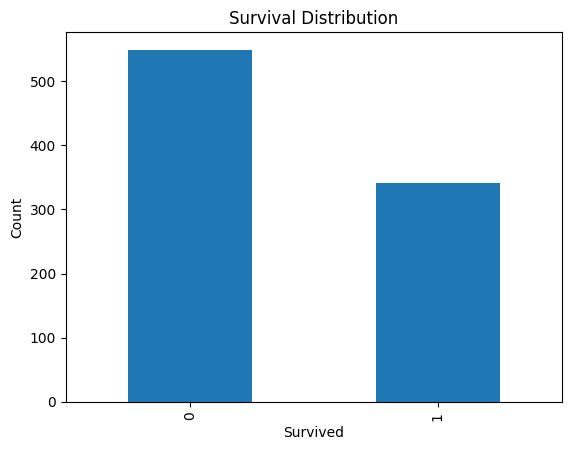

In [ ]:
# Survival Distribution

import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()


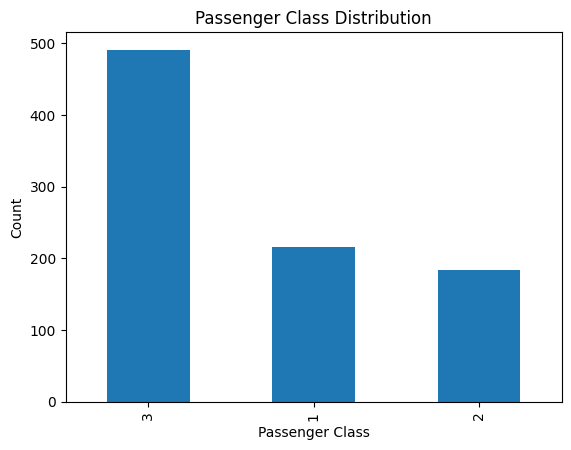

In [ ]:
# Passenger Class Distribution

df['Pclass'].value_counts().plot(kind='bar')
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Passenger Class Distribution")
plt.show()


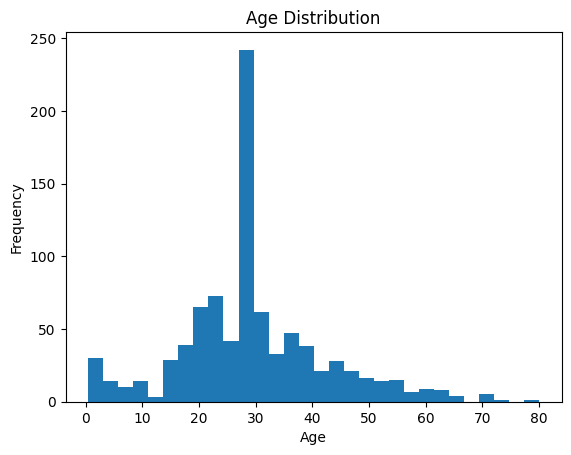

In [ ]:
# Age Distribution

df['Age'].plot(kind='hist', bins=30)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


Task 4: Bivariate & Multivariate Analysis


In [ ]:

pd.crosstab(df['Sex'], df['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


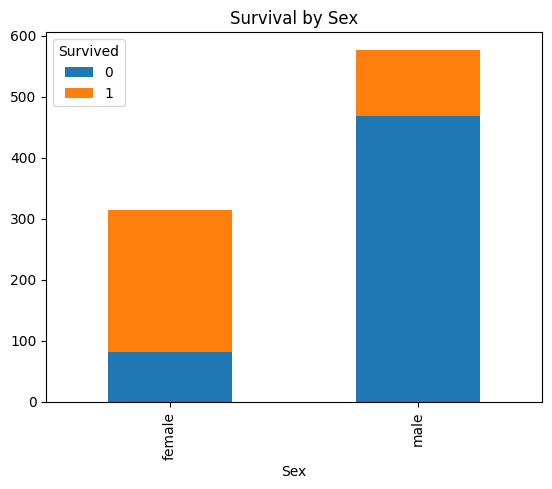

In [ ]:
# Survival by Sex

pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title("Survival by Sex")
plt.show()


In [ ]:


df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

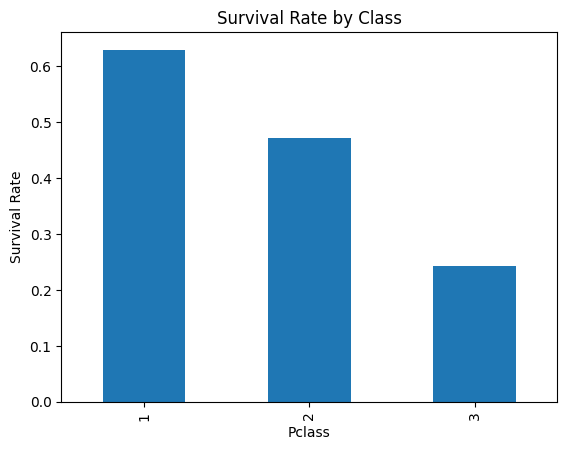

In [ ]:
# Survival by Passenger Class

df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Class")
plt.show()


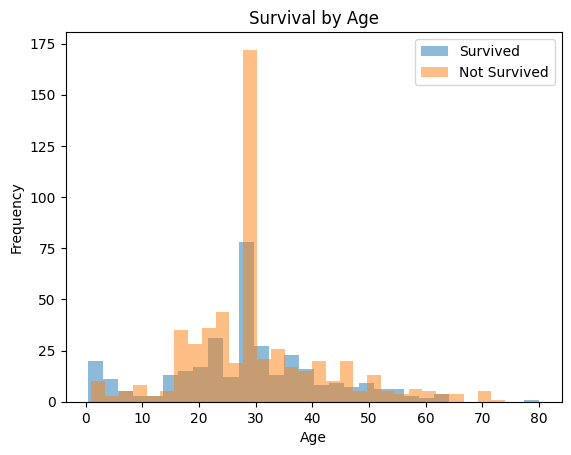

In [ ]:
#  Survival by Age

df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, alpha=0.5, label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, alpha=0.5, label='Not Survived')
plt.legend()
plt.xlabel("Age")
plt.title("Survival by Age")
plt.show()


In [23]:
df.groupby('Embarked')['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

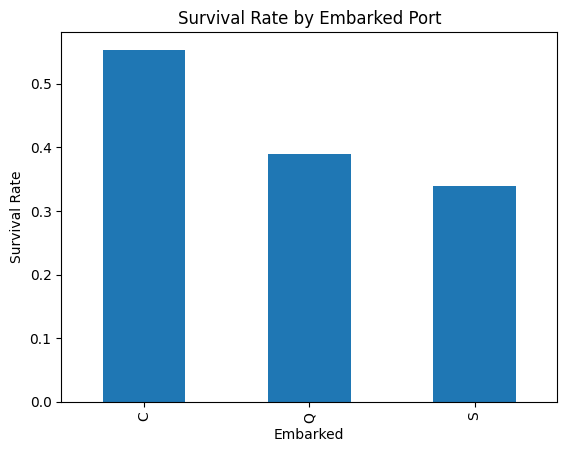

In [ ]:
# Survival by Embarked Port

df.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Embarked Port")
plt.show()


Task 5: Conclusion and Insights (3–5 Sentences)

Conclusion:
The Exploratory Data Analysis of the Titanic dataset reveals that gender, passenger class, and age were the most influential factors affecting survival. Female passengers had a significantly higher survival rate than males, indicating priority during rescue operations. First-class passengers were much more likely to survive compared to those in lower classes, highlighting the impact of socio-economic status. Additionally, children showed higher survival chances, while elderly passengers were more vulnerable. Overall, Sex, Pclass, and Age are the strongest predictors of survival.